In [1]:
%load_ext autoreload
%autoreload 2
from dark_matters.input import read_input_file,read_dm_output
from dark_matters.calculations import run_calculation
from dark_matters.output import fits_map,make_output
from astropy import units
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
data_sets = read_input_file("coma_muons.yaml")
print(data_sets)

{'halo_data': {'cvir': 9.4, 'mvir': np.float64(1200000000000000.0), 'name': 'coma', 'profile': 'nfw', 'rvir': np.float64(2.7), 'scale': np.float64(0.287), 'z': 0.0231}, 'mag_data': {'index': -0.327, 'mag_norm': np.float64(4.7), 'profile': 'beta', 'scale': np.float64(0.253), 'mag_func_lock': False}, 'gas_data': {'index': -0.654, 'gas_norm': np.float64(0.00349), 'profile': 'beta', 'scale': np.float64(0.253)}, 'diff_data': {'diff_constant': np.float64(1e+29), 'diff_index': 0.33333, 'loss_only': False}, 'part_data': {'em_model': 'annihilation', 'part_model': 'mumu'}, 'calc_data': {'os_max_steps': 20, 'calc_mode': 'sb', 'e_sample_number': 50, 'electron_mode': 'os-python', 'f_sample_limits': array([1.e+01, 1.e+05]), 'f_sample_num': 40, 'f_sample_spacing': 'log', 'freq_mode': 'radio', 'log10_r_sample_min_factor': -3, 'm_wimp': array([100.]), 'r_sample_num': 51}, 'cosmo_data': {}}


In [3]:
output_data = run_calculation(**data_sets)

Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: sb
Run Parameters
Frequency Samples: 40
Minimum Frequency Sampled: 1.00e+01 MHz (4.14e-17 GeV) 
Maximum Frequency Sampled: 1.00e+05 MHz (4.14e-13 GeV)
Radial Grid Intervals: 51
Minimum Sampled Radius: 2.87e-04 Mpc
Maximum Sampled Radius: 5.40e+00 Mpc
Halo Parameters: 
Halo Name: coma
Redshift z: 2.31e-02
Luminosity Distance: 1.04e+02 Mpc
Halo profile: nfw
Virial Mass: 1.20e+15 Solar Masses
Virial Radius: 2.70e+00 Mpc
Halo scale radius: 2.87e-01 Mpc
Rho_s/Rho_crit: 2.16e+04
Virial Concentration: 9.40
Gas Parameters: 
Gas density profile: beta
scale: 0.253 Mpc 
index: -0.654
gas_norm: 0.00349 cm^-3 
Magnetic Field Parameters: 
Magnetic field profile: beta
mag_norm: 4.7 micro-Gauss 
scale: 0.253 Mpc 
index: -0.327
Spatial Diffusion
Turbulence index: 0.33
Diffusion constant: 1.00e+29 cm^2 s^-1
Now calculating for Dark Matter model: 
WIMP mass: 100.0 GeV
Particle physics: mumu
Emission type: annihilation
Calculating 

In [4]:
make_output(**output_data,out_mode="yaml")

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/sr', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


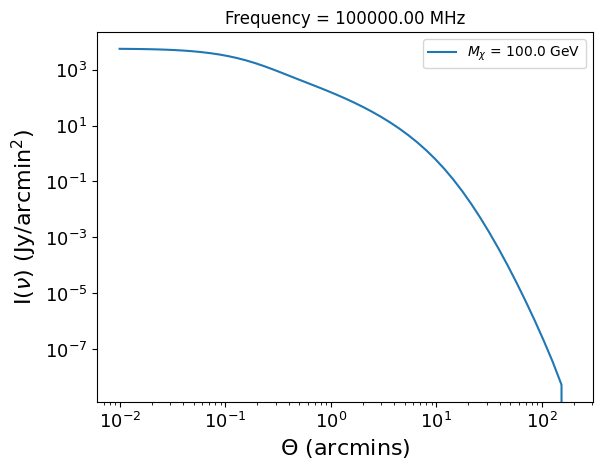

In [5]:
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values'] - 1.0e5)).argmin() #Nearest frequency to 1400 MHz
print(output_data['calc_data']['results']['units'])

for i in range(len(output_data['calc_data']['m_wimp'])):
    plt.plot(output_data['calc_data']['results']['ang_sample_values'],output_data['calc_data']['results']['final_data'][i][freq_index],label=r"$M_\chi$ = "+str(output_data['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"I$(\nu)$ (Jy/arcmin$^2$)",fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")
plt.legend()
plt.show()

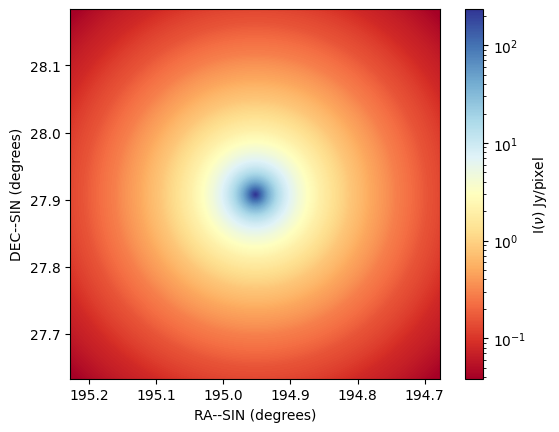

In [6]:
c = SkyCoord(ra="12h59m48.7s", dec=+27.9086, frame='icrs',unit=(units.hourangle, units.deg))
fits_map(c,[0.9e3,1.0e3,1.1e3],output_data['calc_data'],output_data['halo_data'],output_data['part_data'],output_data['diff_data'],display_slice=0,sigv=1e-26,target_resolution=5/60,r_max=0.5) 

In [7]:
in_data = read_dm_output("coma_mumu_mx-10-100-1000GeV_annihilation_nfw_os-python_dl-104.0Mpc_D0-1e+29_sync_sb.yaml")
in_data['calc_data']['calc_mode'] = "flux"
in_data['calc_data']['angmax_integrate'] = 10 #arcmin

*******************************************************
                   Warning
*******************************************************
Loading coma_mumu_mx-10-100-1000GeV_annihilation_nfw_os-python_dl-104.0Mpc_D0-1e+29_sync_sb.yaml with yaml.UnsafeLoader (probably due to numpy objects)
*******************************************************


In [8]:
out_data = run_calculation(**in_data,over_write_electrons=False,clear="final")

Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: flux
Run Parameters
Frequency Samples: 40
Minimum Frequency Sampled: 1.00e+01 MHz (4.14e-17 GeV) 
Maximum Frequency Sampled: 1.00e+05 MHz (4.14e-13 GeV)
Radial Grid Intervals: 51
Minimum Sampled Radius: 2.87e-04 Mpc
Maximum Sampled Radius: 5.40e+00 Mpc
Halo Parameters: 
Halo Name: coma
Redshift z: 2.31e-02
Luminosity Distance: 1.04e+02 Mpc
Halo profile: nfw
Virial Mass: 1.20e+15 Solar Masses
Virial Radius: 2.70e+00 Mpc
Halo scale radius: 2.87e-01 Mpc
Rho_s/Rho_crit: 2.16e+04
Virial Concentration: 9.40
Gas Parameters: 
Gas density profile: beta
scale: 0.253 Mpc 
index: -0.654
gas_norm: 0.00349 cm^-3 
Magnetic Field Parameters: 
Magnetic field profile: beta
mag_norm: 4.7 micro-Gauss 
scale: 0.253 Mpc 
index: -0.327
Spatial Diffusion
Turbulence index: 0.33
Diffusion constant: 1.00e+29 cm^2 s^-1
Now calculating for Dark Matter model: 
WIMP mass: 10.0 GeV
Particle physics: mumu
Emission type: annihilation
Electron Eq

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


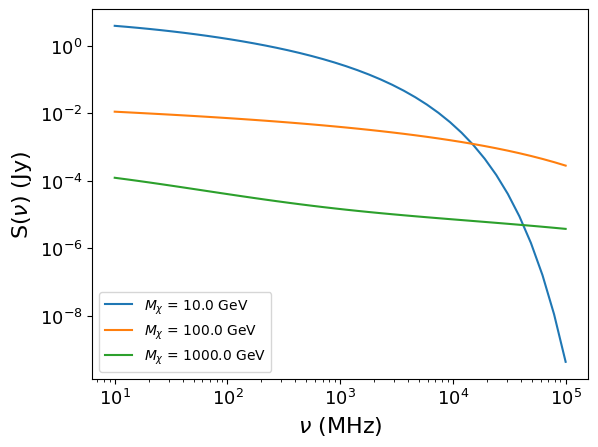

In [9]:
print(out_data['calc_data']['results']['units'])
for i in range(len(out_data['calc_data']['m_wimp'])):
    plt.plot(out_data['calc_data']['results']['f_sample_values'],out_data['calc_data']['results']['final_data'][i],label=r"$M_\chi$ = "+str(out_data['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"S$(\nu)$ (Jy)",fontsize=16)
plt.xlabel(r"$\nu$ (MHz)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()